<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_6_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Library yang akan digunakan

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [3]:
imgLena = cv.imread('/content/gdrive/MyDrive/PCVK/lena.jpg')

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

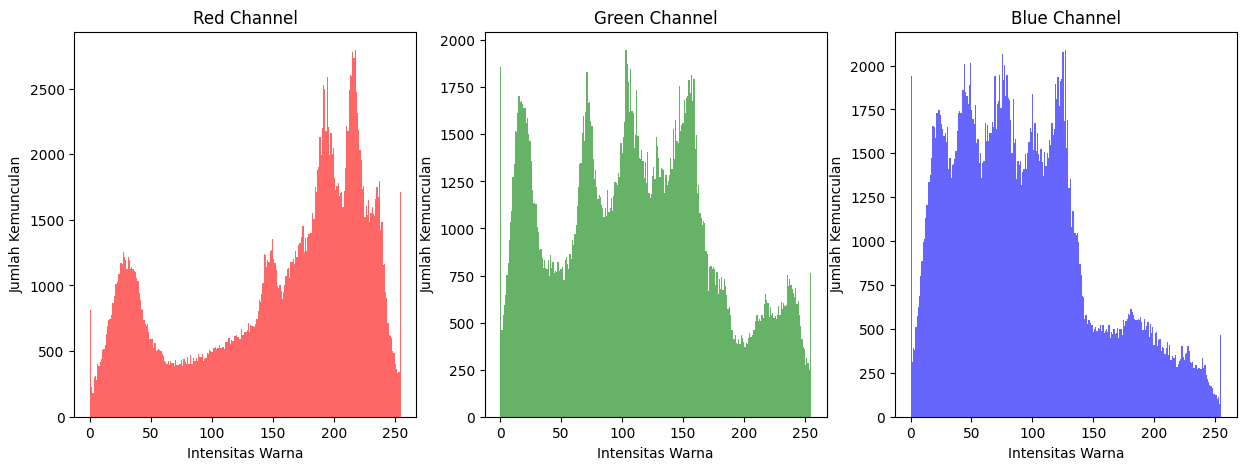

In [4]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisahkan channel warna
red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# Buat plot gambar
plt.figure(figsize=(15, 5))

# Histogram untuk tiap channel warna
plt.subplot(131)
plt.hist(red_channel, bins=256, color="red", alpha=0.6)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(132)
plt.hist(green_channel, bins=256, color="green", alpha=0.6)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(133)
plt.hist(blue_channel, bins=256, color="blue", alpha=0.6)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.show()

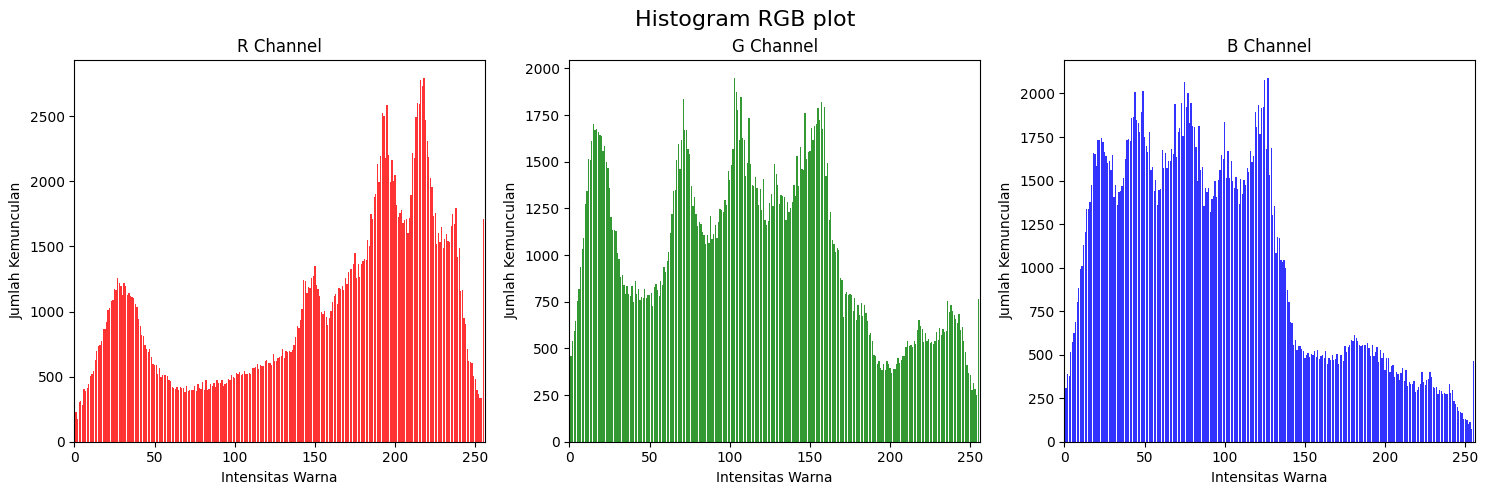

In [5]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot', fontsize=16)

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    histogram = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), histogram.ravel(), color=color, alpha=0.8)
    plt.title(f'{color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


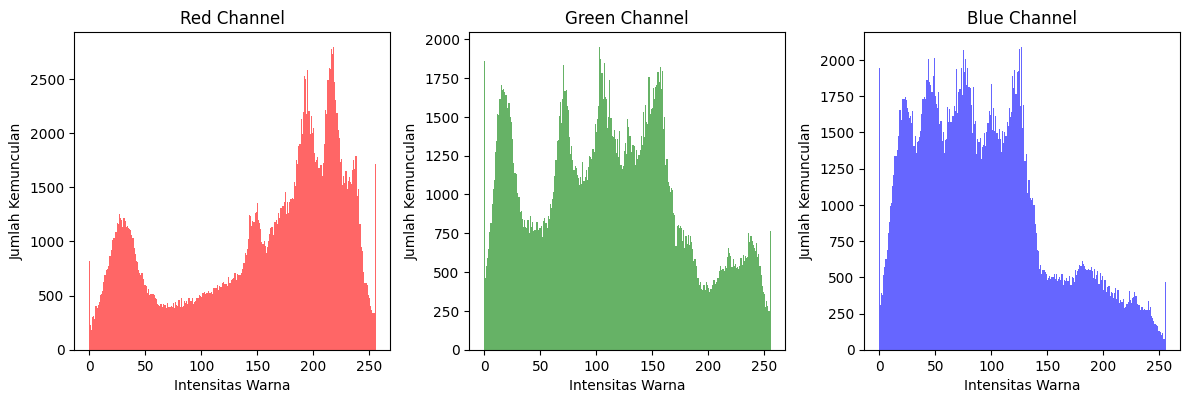

In [6]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisahkan channel warna
red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# Membuat histogram RGB dengan np.histogram
red_hist_np, red_bins_np = np.histogram(red_channel, bins=256, range=(0, 256))
green_hist_np, green_bins_np = np.histogram(green_channel, bins=256, range=(0, 256))
blue_hist_np, blue_bins_np = np.histogram(blue_channel, bins=256, range=(0, 256))

# Buat layout
plt.figure(figsize=(12, 8))

# Membuat histogram untuk masing-masing channel warna
plt.subplot(231)
plt.bar(red_bins_np[:-1], red_hist_np, color='red', alpha=0.6, width=1)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(232)
plt.bar(green_bins_np[:-1], green_hist_np, color='green', alpha=0.6, width=1)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(233)
plt.bar(blue_bins_np[:-1], blue_hist_np, color='blue', alpha=0.6, width=1)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [7]:
imgLenalc = cv.imread('/content/gdrive/MyDrive/PCVK/lena_lc.jpg')

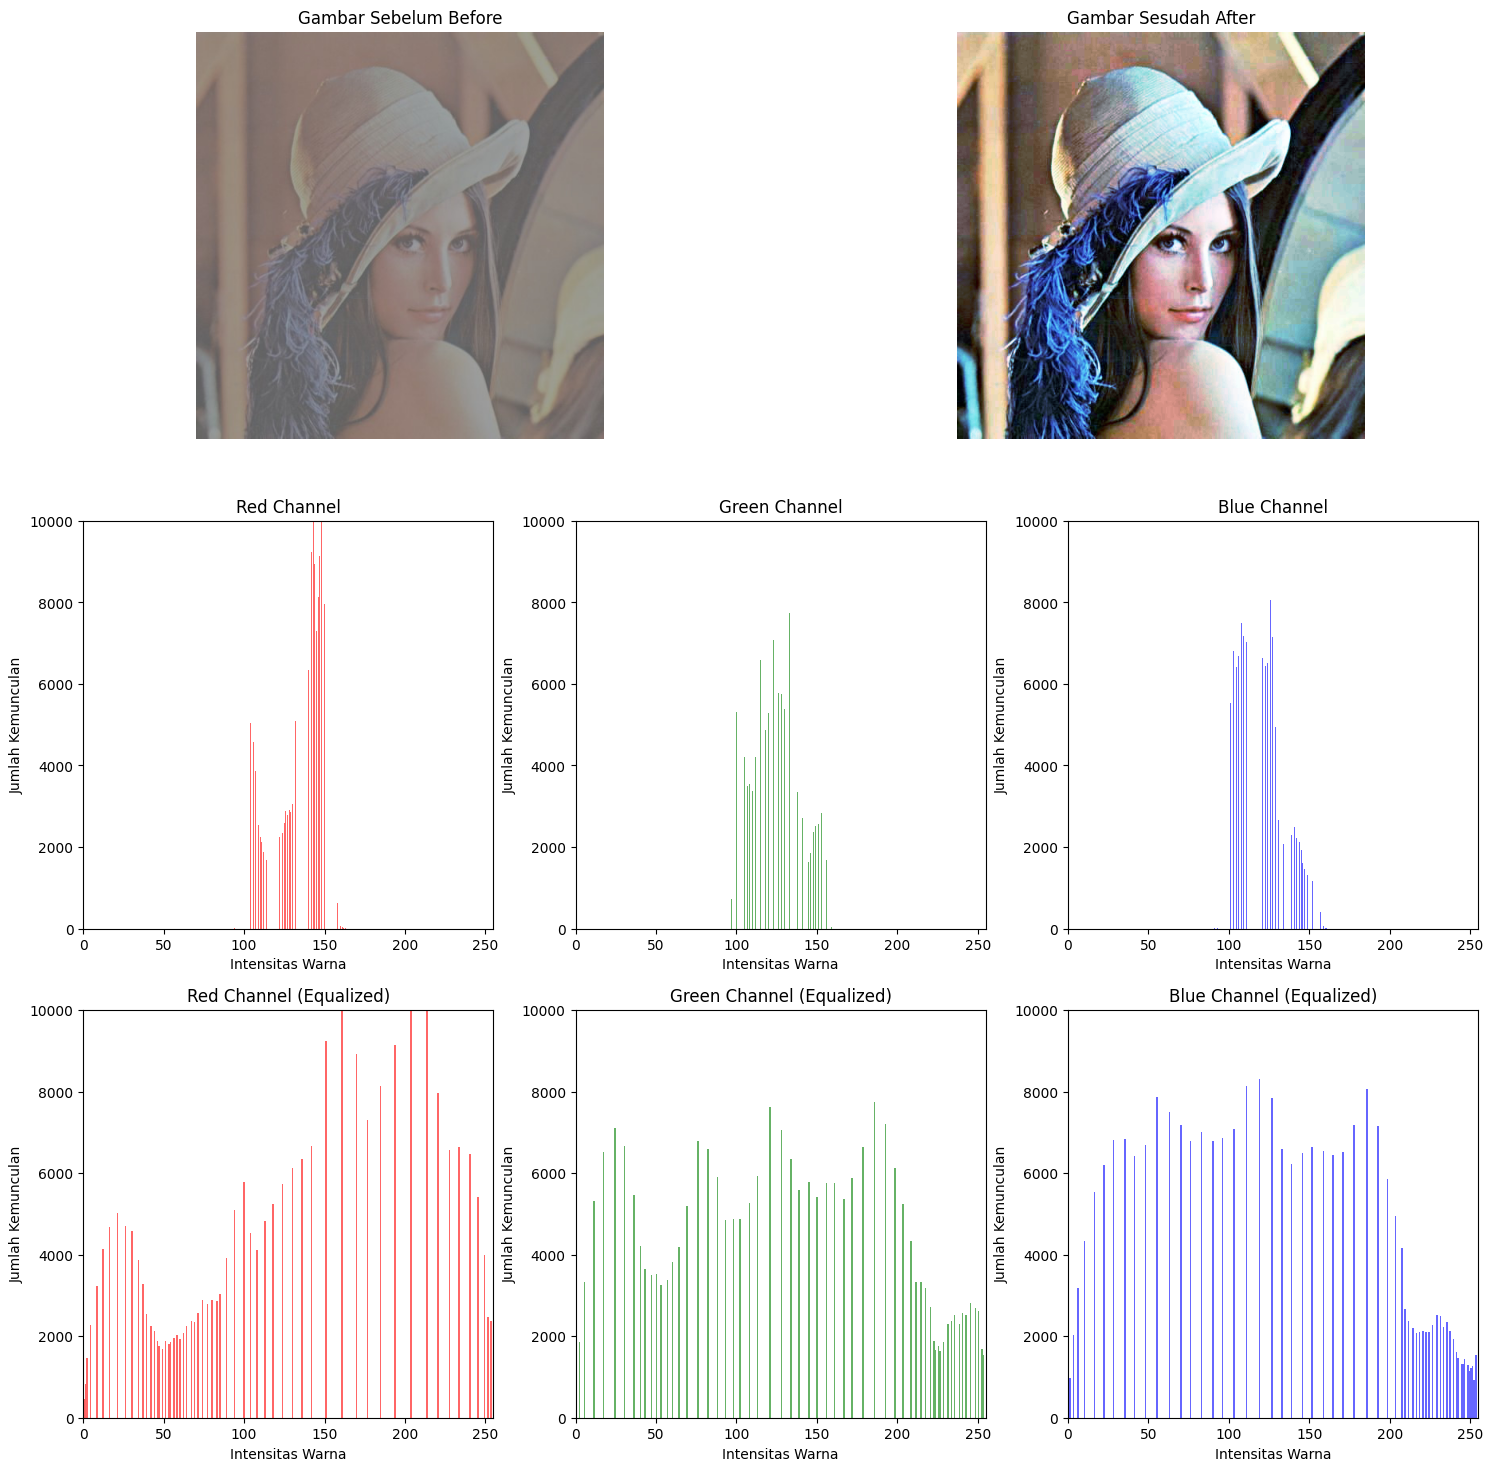

In [8]:
img = imgLenalc.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Menghitung jumlah kemunculan tiap pixel warna
red_hist, red_bins = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
green_hist, green_bins = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
blue_hist, blue_bins = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

# Menghitung penjumlahan kumulatif dari frekuensi
red_cumulative = np.cumsum(red_hist)
green_cumulative = np.cumsum(green_hist)
blue_cumulative = np.cumsum(blue_hist)

# Normalisasi kumulatif frekuensi
num_pixels = img.shape[0] * img.shape[1]
red_normalized = (red_cumulative / num_pixels) * 255
green_normalized = (green_cumulative / num_pixels) * 255
blue_normalized = (blue_cumulative / num_pixels) * 255

# Implementasi rumus histogram equalization
red_equal_img = red_normalized[img[:, :, 0]]
green_equal_img = green_normalized[img[:, :, 1]]
blue_equal_img = blue_normalized[img[:, :, 2]]

# Merge warna equalisasi
equal_img = np.zeros_like(img)
equal_img[:, :, 0] = red_equal_img.astype(np.uint8) # .astype(np.uint8) untuk konversi ke data yang benar
equal_img[:, :, 1] = green_equal_img.astype(np.uint8)
equal_img[:, :, 2] = blue_equal_img.astype(np.uint8)

# Menampilkan hasil
plt.figure(figsize=(18,18))

# Menampilkan gambar sebelum before dan sesudah after
plt.subplot(321)
plt.imshow(img)
plt.axis('off')
plt.title('Gambar Sebelum Before')

plt.subplot(322)
plt.imshow(equal_img)
plt.axis('off')
plt.title('Gambar Sesudah After')

# Histogram untuk gambar asli
plt.subplot(334)
plt.hist(img[:, :, 0].ravel(), bins=256, color="red", alpha=0.6)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(335)
plt.hist(img[:, :, 1].ravel(), bins=256, color="green", alpha=0.6)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(336)
plt.hist(img[:, :, 2].ravel(), bins=256, color="blue", alpha=0.6)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

# Histogram untuk gambar equalization
plt.subplot(337)
plt.hist(equal_img[:, :, 0].ravel(), bins=256, color="red", alpha=0.6)
plt.title('Red Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(338)
plt.hist(equal_img[:, :, 1].ravel(), bins=256, color="green", alpha=0.6)
plt.title('Green Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(339)
plt.hist(equal_img[:, :, 2].ravel(), bins=256, color="blue", alpha=0.6)
plt.title('Blue Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

# plt.tight_layout()
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

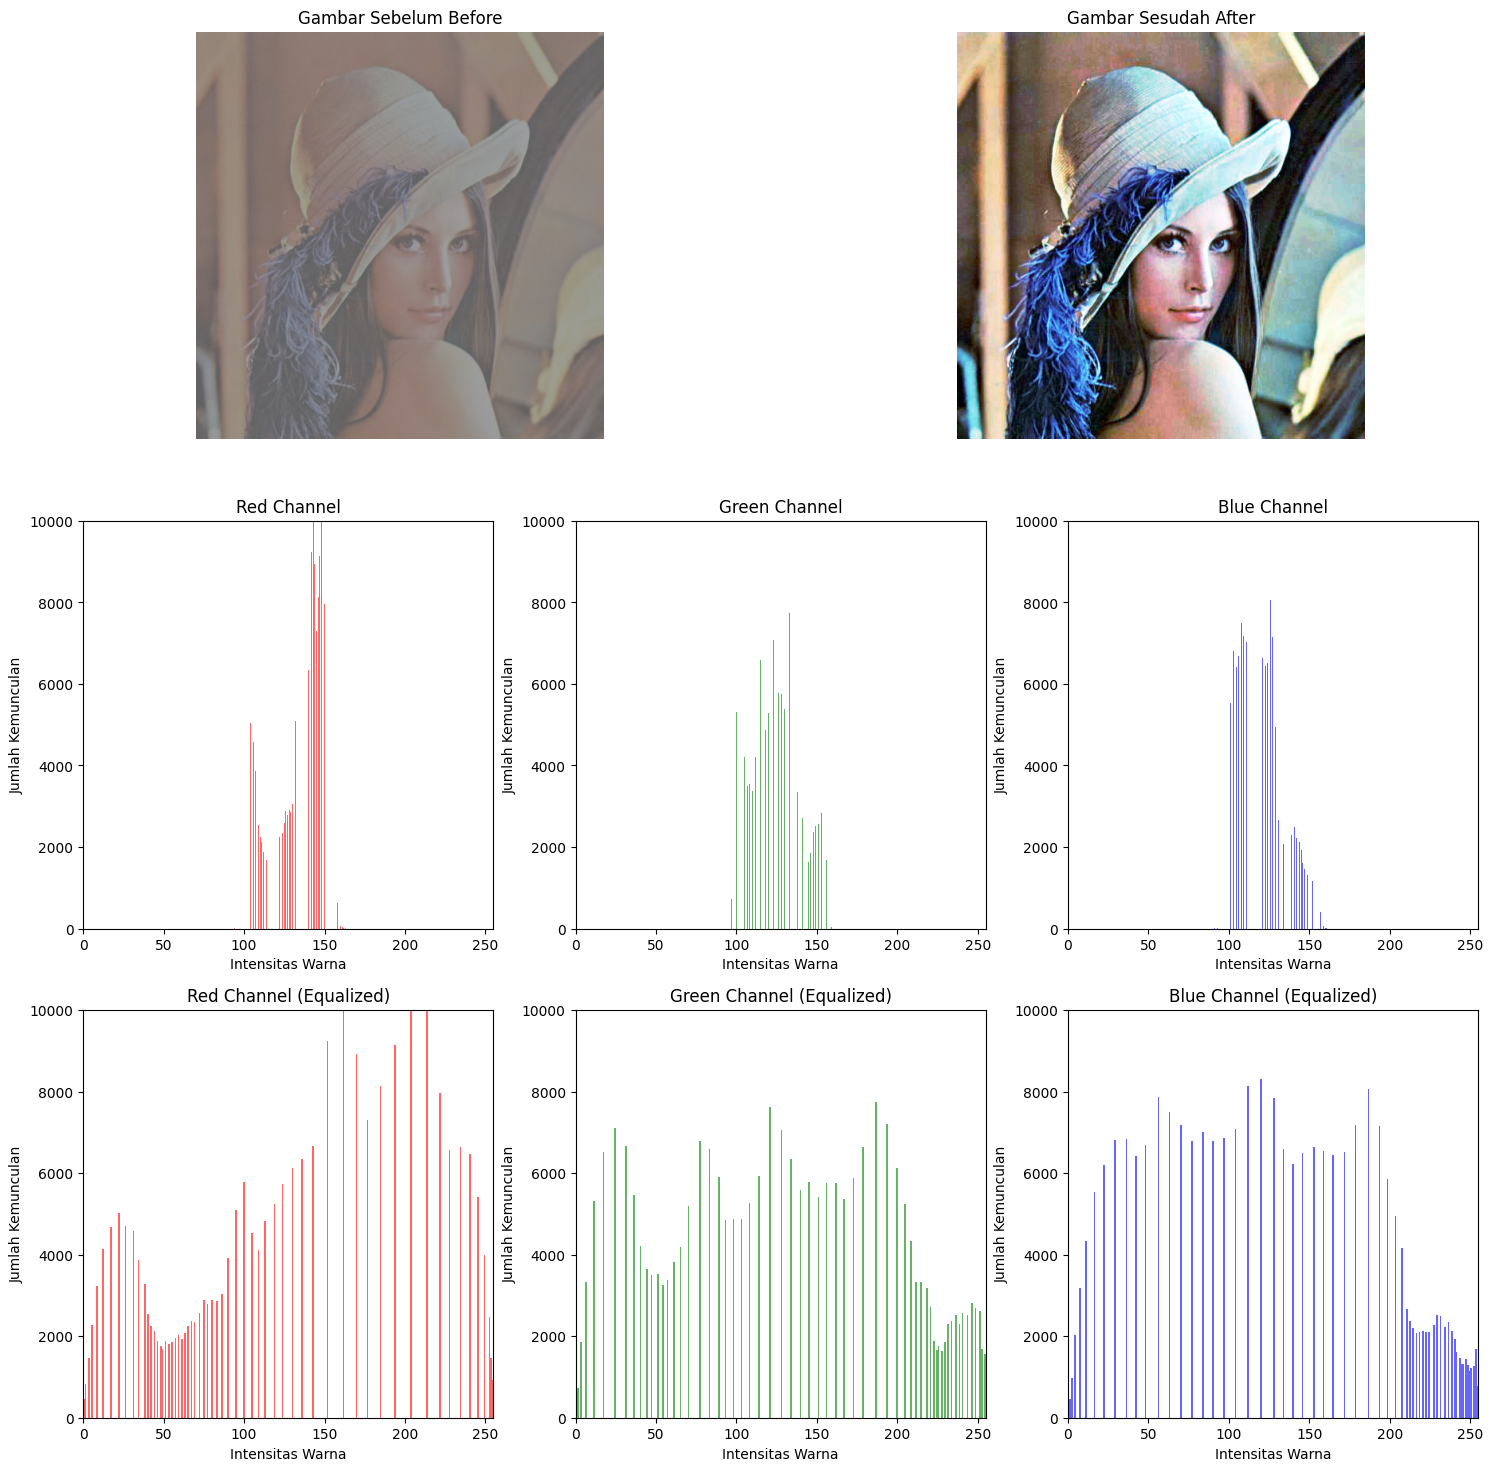

In [9]:
img = imgLenalc.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Split channel warna
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

# Implementasi rumus equalization menggunakan euqalizeHist(cv2)
red_equal_cv = cv.equalizeHist(red_channel)
green_equal_cv = cv.equalizeHist(green_channel)
blue_equal_cv = cv.equalizeHist(blue_channel)

# Merge warna equalisasi
equal_img_cv = np.zeros_like(img)
equal_img_cv[:, :, 0] = red_equal_cv.astype(np.uint8) # .astype(np.uint8) untuk konversi ke data yang benar
equal_img_cv[:, :, 1] = green_equal_cv.astype(np.uint8)
equal_img_cv[:, :, 2] = blue_equal_cv.astype(np.uint8)

# Menampilkan hasil
plt.figure(figsize=(18,18))

# Menampilkan gambar sebelum before dan sesudah after
plt.subplot(321)
plt.imshow(img)
plt.axis('off')
plt.title('Gambar Sebelum Before')

plt.subplot(322)
plt.imshow(equal_img_cv)
plt.axis('off')
plt.title('Gambar Sesudah After')

# Menampilkan histogram gambar asli
plt.subplot(334)
plt.hist(img[:, :, 0].ravel(), bins=256, color="red", alpha=0.6)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(335)
plt.hist(img[:, :, 1].ravel(), bins=256, color="green", alpha=0.6)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(336)
plt.hist(img[:, :, 2].ravel(), bins=256, color="blue", alpha=0.6)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)


# Menampilkan histogram gambar equalization
plt.subplot(337)
plt.hist(red_equal_cv.ravel(), bins=256, color="red", alpha=0.6)
plt.title('Red Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(338)
plt.hist(green_equal_cv.ravel(), bins=256, color="green", alpha=0.6)
plt.title('Green Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

plt.subplot(339)
plt.hist(blue_equal_cv.ravel(), bins=256, color="blue", alpha=0.6)
plt.title('Blue Channel (Equalized)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim(0, 255)
plt.ylim(0, 10000)

# plt.tight_layout()
plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


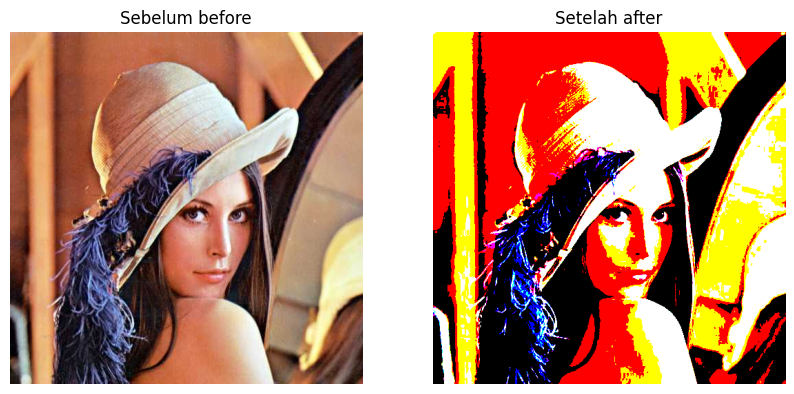

In [10]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Definisikan 8 warna dasar (RGB)
color_palette = {
    'black': np.array([0, 0, 0]),
    'white': np.array([255, 255, 255]),
    'red': np.array([255, 0, 0]),
    'green': np.array([0, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'yellow': np.array([255, 255, 0])
}

# Fungsi untuk menghitung jarak antara 2 nilai RGB
def calculate_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Fungsi untuk melihat warna pixel terdekat dengan yang sudah didefinisikan
def map_color_to_palette(pixel, palette):
    min_distance = float('inf')
    nearest_color = None

    # Komparasi jarak pixel setiap warna
    for color_name, color_value in palette.items():
        distance = calculate_distance(pixel, color_value)
        if distance < min_distance:
            min_distance = distance
            nearest_color = color_value

    return nearest_color

# Copy untuk output
mapped_img = np.zeros_like(img)

# Perulangan untuk tiap pixel untuk dirubah ke warna terdekat
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        mapped_img[i, j] = map_color_to_palette(img[i, j], color_palette)

# Membuat layout
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Sebelum before')

plt.subplot(1, 2, 2)
plt.imshow(mapped_img)
plt.axis('off')
plt.title('Setelah after')

plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!